# PREDICTOR

# Getting The Data

### Setup IG Session

In [1]:
pip install trading_ig pandas munch tenacity

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys

sys.path.append("./utils/")

In [3]:
from utils.IG import IG

_IG = IG()
config_live = _IG.getLoginConfig('live')

IG - Instantiated


In [4]:
ig_service_live = _IG.getIgService(config_live)
_IG.getIgAccountDetails(ig_service_live)

{'accountType': 'CFD',
 'accountInfo': {'balance': 236.35,
  'deposit': 52.81,
  'profitLoss': -38.7,
  'available': 144.84},
 'currencyIsoCode': 'USD',
 'currencySymbol': '$',
 'currentAccountId': 'QM0EM',
 'lightstreamerEndpoint': 'https://apd.marketdatasystems.com',
 'accounts': [{'accountId': 'QM0EM',
   'accountName': 'CFD Live',
   'preferred': True,
   'accountType': 'CFD'}],
 'clientId': '104831189',
 'timezoneOffset': 8,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

### Get the Data of GBP/USD Mini

In [5]:
TARGET_EPIC = 'CS.D.GBPUSD.MINI.IP'
RESOLUTION = '15Min'
DATA_POINTS = 8

In [6]:
try:
    history = _IG.getHistoricalPricesByDataPoints(ig_service_live, {'TARGET_EPIC':TARGET_EPIC, 
                                                                    'RESOLUTION':RESOLUTION, 
                                                                    'DATA_POINTS':DATA_POINTS})
    history['prices']
except Exception as e:
    print(e)
    sys.exit(1)

In [7]:
import pandas as pd

df_history = pd.DataFrame.from_dict(history['prices'])
df_history = df_history.reset_index()
df_history

DateTime      bid                                 ask           \
                          Open     High      Low    Close     Open     High   
0 2022-05-09 23:30:00  1.23093  1.23254  1.23064  1.23228  1.23102  1.23263   
1 2022-05-09 23:45:00  1.23227  1.23413  1.23214  1.23336  1.23236  1.23422   
2 2022-05-10 00:00:00  1.23333  1.23540  1.23250  1.23533  1.23348  1.23549   
3 2022-05-10 00:15:00  1.23534  1.23770  1.23533  1.23750  1.23549  1.23782   
4 2022-05-10 00:30:00  1.23746  1.23802  1.23607  1.23610  1.23761  1.23815   
5 2022-05-10 00:45:00  1.23611  1.23614  1.23464  1.23476  1.23626  1.23628   
6 2022-05-10 01:00:00  1.23475  1.23551  1.23430  1.23437  1.23484  1.23561   
7 2022-05-10 01:15:00  1.23435  1.23489  1.23402  1.23445  1.23444  1.23501   

                    last                        
       Low    Close Open High Low Close Volume  
0  1.23073  1.23237  NaN  NaN NaN   NaN   2862  
1  1.23223  1.23345  NaN  NaN NaN   NaN   2735  
2  1.23265  1.23548  NaN  NaN NaN   NaN   3152  
3  1.23547  1.23759  NaN  NaN NaN   NaN   3353  
4  1.23621  1.23625  NaN  NaN NaN   NaN   2990  
5  1.23473  1.23485  NaN  NaN NaN   NaN   1999  
6  1.23439  1.23446  NaN  NaN NaN   NaN   2386  
7  1.23414  1.23454  NaN  NaN NaN   NaN   1467

In [8]:
df_history = df_history.sort_values(by=['DateTime'], ascending=False)
df_history

DateTime      bid                                 ask           \
                          Open     High      Low    Close     Open     High   
7 2022-05-10 01:15:00  1.23435  1.23489  1.23402  1.23445  1.23444  1.23501   
6 2022-05-10 01:00:00  1.23475  1.23551  1.23430  1.23437  1.23484  1.23561   
5 2022-05-10 00:45:00  1.23611  1.23614  1.23464  1.23476  1.23626  1.23628   
4 2022-05-10 00:30:00  1.23746  1.23802  1.23607  1.23610  1.23761  1.23815   
3 2022-05-10 00:15:00  1.23534  1.23770  1.23533  1.23750  1.23549  1.23782   
2 2022-05-10 00:00:00  1.23333  1.23540  1.23250  1.23533  1.23348  1.23549   
1 2022-05-09 23:45:00  1.23227  1.23413  1.23214  1.23336  1.23236  1.23422   
0 2022-05-09 23:30:00  1.23093  1.23254  1.23064  1.23228  1.23102  1.23263   

                    last                        
       Low    Close Open High Low Close Volume  
7  1.23414  1.23454  NaN  NaN NaN   NaN   1467  
6  1.23439  1.23446  NaN  NaN NaN   NaN   2386  
5  1.23473  1.23485  NaN  NaN NaN   NaN   1999  
4  1.23621  1.23625  NaN  NaN NaN   NaN   2990  
3  1.23547  1.23759  NaN  NaN NaN   NaN   3353  
2  1.23265  1.23548  NaN  NaN NaN   NaN   3152  
1  1.23223  1.23345  NaN  NaN NaN   NaN   2735  
0  1.23073  1.23237  NaN  NaN NaN   NaN   2862

In [9]:
df_history.describe()

bid                                     ask                      \
           Open      High       Low     Close      Open      High       Low   
count  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000   
mean   1.234317  1.235541  1.233705  1.234769  1.234437  1.235651  1.233819   
std    0.002103  0.001797  0.001807  0.001603  0.002124  0.001811  0.001818   
min    1.230930  1.232540  1.230640  1.232280  1.231020  1.232630  1.230730   
25%    1.233065  1.234700  1.232410  1.234117  1.233200  1.234812  1.232545   
50%    1.234550  1.235455  1.234160  1.234605  1.234640  1.235550  1.234265   
75%    1.235533  1.236530  1.234812  1.235523  1.235683  1.236665  1.234915   
max    1.237460  1.238020  1.236070  1.237500  1.237610  1.238150  1.236210   

                last                              
          Close Open High  Low Close      Volume  
count  8.000000  0.0  0.0  0.0   0.0     8.00000  
mean   1.234874  NaN  NaN  NaN   NaN  2618.00000  
std    0.001613  NaN  NaN  NaN   NaN   632.31728  
min    1.232370  NaN  NaN  NaN   NaN  1467.00000  
25%    1.234207  NaN  NaN  NaN   NaN  2289.25000  
50%    1.234695  NaN  NaN  NaN   NaN  2798.50000  
75%    1.235672  NaN  NaN  NaN   NaN  3030.50000  
max    1.237590  NaN  NaN  NaN   NaN  3353.00000

# Data Transformation

### Refer to the Notebook (Data_Transformer.ipynb) for the detailed process

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf

In [12]:
from datetime import datetime

In [13]:
param = df_history
mode = "predictor"
%run ./utils/Data_Transformer.ipynb

Note: you may need to restart the kernel to use updated packages.


In [14]:
df_min_max_scaled

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
6,0.056275,0.055130,0.055897,0.053576,0.310376,0.120444,0.042056,0.093193,0.006452,0.092910,0.043094,0.0
5,0.065587,0.059538,0.058195,0.056275,0.259992,0.004754,0.139252,0.113452,0.012903,0.118174,0.151381,0.0
4,0.074764,0.072218,0.067996,0.065520,0.389012,0.085578,0.130841,0.153971,0.004301,0.152404,0.150276,0.0
3,0.060459,0.070048,0.062994,0.074696,0.436271,0.370840,0.001869,0.017828,0.230108,0.186634,0.234254,1.0
2,0.046829,0.054316,0.043934,0.060324,0.410103,0.323296,0.076636,0.002431,0.304301,0.227384,0.222099,1.0
1,0.039474,0.045772,0.041230,0.046761,0.355813,0.296355,0.012150,0.063209,0.131183,0.157294,0.120442,1.0
0,0.030499,0.034922,0.031159,0.039474,0.372347,0.253566,0.027103,0.021070,0.175269,0.148329,0.148066,1.0


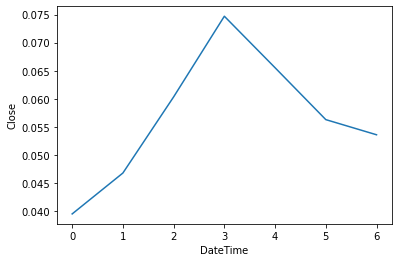

<Figure size 1152x648 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.plot(df_min_max_scaled['Close'])

plt.xlabel("DateTime")
plt.ylabel("Close")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [16]:
df_history2

DateTime      bid                                 ask           \
                          Open     High      Low    Close     Open     High   
6 2022-05-10 01:00:00  1.23475  1.23551  1.23430  1.23437  1.23484  1.23561   
5 2022-05-10 00:45:00  1.23611  1.23614  1.23464  1.23476  1.23626  1.23628   
4 2022-05-10 00:30:00  1.23746  1.23802  1.23607  1.23610  1.23761  1.23815   
3 2022-05-10 00:15:00  1.23534  1.23770  1.23533  1.23750  1.23549  1.23782   
2 2022-05-10 00:00:00  1.23333  1.23540  1.23250  1.23533  1.23348  1.23549   
1 2022-05-09 23:45:00  1.23227  1.23413  1.23214  1.23336  1.23236  1.23422   
0 2022-05-09 23:30:00  1.23093  1.23254  1.23064  1.23228  1.23102  1.23263   

                      last      mid                             
       Low    Close Volume     Open     High      Low    Close  
6  1.23439  1.23446   2386  1.23480  1.23556  1.23435  1.23441  
5  1.23473  1.23485   1999  1.23618  1.23621  1.23469  1.23481  
4  1.23621  1.23625   2990  1.23754  1.23808  1.23614  1.23618  
3  1.23547  1.23759   3353  1.23542  1.23776  1.23540  1.23754  
2  1.23265  1.23548   3152  1.23340  1.23544  1.23258  1.23541  
1  1.23223  1.23345   2735  1.23231  1.23418  1.23218  1.23340  
0  1.23073  1.23237   2862  1.23098  1.23258  1.23069  1.23232

In [17]:
df = df_min_max_scaled.copy()

In [18]:
# column_indices = {name: i for i, name in enumerate(df.columns)}

# n = len(df)
# train_df = df[0:int(n*0.7)]
# val_df = df[int(n*0.7):int(n*0.9)]
# test_df = df[int(n*0.9):]

# num_features = df.shape[1]

In [19]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df
val_df = df
test_df = df

num_features = df.shape[1]

In [20]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                                   enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [29]:
wide_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['Close'])

wide_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

In [30]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
        
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [31]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
        
    plt.xlabel('DateTime')

WindowGenerator.plot = plot

In [32]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [33]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [34]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', model(wide_window.example[0]).shape)

StopIteration: 

# Predict

In [ ]:
PREDICTOR_NAME = 'lstm_model'

In [ ]:
model = tf.keras.models.load_model(f'''../models/{PREDICTOR_NAME}''')

In [ ]:
prediction = model.predict(wide_window.test)
prediction

In [ ]:
import matplotlib.pyplot as plt

plt.plot(prediction)

plt.xlabel("DateTime")
plt.ylabel("Close")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [ ]:
norm_prediction = round2(prediction[len(prediction)-1], 5)
norm_prediction

### Get the UnNormalization Parameters

In [ ]:
import json

f = open('../models/unnormalized_parameters.json')
data = json.load(f)
f.close()

In [ ]:
data['Close']

### UnNormalized the Prediction

In [ ]:
# X = normX * (maxX - minX) + minX

predicted = norm_prediction * (data['Close']['max'] - data['Close']['min']) + data['Close']['min']
predicted = round2(predicted, 5)
predicted

# Decision

In [ ]:
df_history2.iloc[[len(df_history2)-1]]

In [ ]:
current_candle = df_min_max_scaled.iloc[[len(df_min_max_scaled)-1]]
current_candle

In [ ]:
current_close = round2(current_candle['Close'].values[0] * (data['Close']['max'] - data['Close']['min']) + data['Close']['min'], 5)
print(f'''current_close: {current_close}''')

In [ ]:
predicted
print(f'''prediction: {predicted}''')

In [ ]:
change = round2((predicted - current_close), 5)
change

In [ ]:
CONFIDENCE_THRESHOLD = 0.0005
PROFIT_PIP = 0.0002

In [ ]:
to_deal = True
deal_direction = None
profit_limit = None

if abs(change) > CONFIDENCE_THRESHOLD:
    if change > 0:
        print("BUY")
        deal_direction = 'BUY'
        profit_limit = round2(current_close+PROFIT_PIP, 5)
        print(f'''Limit: {profit_limit}''')
    elif change < 0:
        print("SELL")
        deal_direction = 'SELL'
        profit_limit = round2(current_close-PROFIT_PIP, 5)
        print(f'''Limit: {profit_limit}''')
    else:
        print("NEUTRAL")
        to_deal = False

# IG Trade - Open Deal

In [ ]:
LIMIT_BUY_COUNT = 1
LIMIT_SELL_COUNT = 1

In [ ]:
DEAL_SIZE = 1

In [ ]:
# if to_deal and _IG.isAllowedToOpenDeal(ig_service_live, {deal_direction, 
#                                                          LIMIT_BUY_COUNT,
#                                                          LIMIT_SELL_COUNT}):
#     _IG.openDeal(ig_service_live, {'currency_code':'USD',
#                                    'direction':deal_direction,
#                                    'epic':TARGET_EPIC,
#                                    'order_type':'MARKET',
#                                    'expiry':'DFB',
#                                    'force_open':'true',
#                                    'guaranteed_stop':'false',
#                                    'size':DEAL_SIZE, 
#                                    'level':None,
#                                    'limit_distance':PROFIT_PIP,
#                                    'limit_level':None,
#                                    'quote_id':None,
#                                    'stop_level':None,
#                                    'stop_distance':None,
#                                    'trailing_stop'=None,
#                                    'trailing_stop_increment'=None})
        